<a href="https://colab.research.google.com/github/ansrl516/RTN_Paper/blob/main/RTN_f5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as Variable
import numpy as np

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [3]:
class Fig5(nn.Module):

    def __init__(self, M, n, EbNo):
        super().__init__()
        self.M = M
        self.n = n
        self.b = 1/(2*(math.log2(M)/n)*EbNo)
        self.Dense1 = nn.Linear(2*M,2*M)
        self.relu1 = nn.ReLU()
        self.Dense2 = nn.Linear(2*M,2*n)
        self.BatchNorm = nn.BatchNorm1d(num_features=2*n, affine=False, track_running_stats=True)
        self.Dense3 = nn.Linear(2*n,2*M)
        self.relu3 = nn.ReLU()
        self.Dense4 = nn.Linear(2*M,2*M)
        self.softmax = nn.Softmax(dim=1)

    def f(self,x):
        #print(x)
        x = self.Dense1(x)
        x = self.relu1(x)
        x = self.Dense2(x)
        x = self.BatchNorm(x)
        return x

    def channel(self,x):
        noise = torch.normal(0,math.sqrt(self.b),size=(x.shape[0],2*n))
        u1 = x[:,0:self.n]
        u2 = x[:,self.n:2*self.n]
        x[:,0:self.n] = u1 + u2 + noise[:,0:self.n]
        x[:,self.n:2*self.n] = u1 + u2 + noise[:,self.n:2*self.n]
        return x

    def g(self,x):
        x = self.Dense3(x)
        x = self.relu3(x)
        x = self.Dense4(x)
        x = torch.cat((self.softmax(x[:,0:self.M]),self.softmax(x[:,self.M:self.M*2])),dim=1)
        return x

    def forward(self,x):
        x = self.f(x)
        x = self.channel(x)
        x = self.g(x)
        return x

In [152]:
#x=torch.tensor([[1.0,1,1,1],[2,2,2,2],[3,3,3,3]])
#soft = nn.Softmax(dim=1)
#print(torch.cat((x[:,0:2],x[:,0:2]),dim=1))
##soft(x[:,0:2])
print(data[4:8,:])
print(model(data[4:8,:]))
print(A[4:8,:])
print(model(A[4:8,:]))

tensor([[0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0.]])
tensor([[4.7384e-04, 2.7408e-05, 9.9949e-01, 9.5503e-06, 5.6984e-01, 8.0390e-02,
         3.3953e-01, 1.0238e-02],
        [3.9859e-05, 2.4352e-05, 3.7785e-07, 9.9994e-01, 3.3312e-01, 1.8818e-01,
         4.6619e-01, 1.2501e-02],
        [1.8164e-05, 9.9937e-01, 1.0864e-04, 5.0811e-04, 5.2299e-02, 4.2278e-02,
         5.8069e-02, 8.4735e-01],
        [9.9960e-01, 1.6624e-06, 1.1680e-04, 2.8119e-04, 6.9918e-01, 5.5314e-02,
         9.9131e-02, 1.4637e-01]], grad_fn=<CatBackward0>)
tensor([[0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1.]])
tensor([[0.2456, 0.0094, 0.7271, 0.0179, 0.4657, 0.1097, 0.3343, 0.0903],
        [0.0611, 0.0484, 0.0303, 0.8601, 0.3253, 0.2010, 0.3462, 0.1275],
        [0.0678, 0.0233, 0.01

In [4]:
# Import Dataset of Epoch = 80, Batch_size = 32, Dataset = 6 * 10^4(Train) / 10^7(Test), Learning Rate = 0.001, Adam Optimizer
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

n, k = 2, 2
dataset_num = 10 ** 6
data1 = F.one_hot(torch.randint(high=2**k,size=(dataset_num,)),num_classes=2**k)
data1 = data1.to(torch.float32)

data2 = F.one_hot(torch.randint(high=2**k,size=(dataset_num,)),num_classes=2**k)
data2 = data2.to(torch.float32)
data = torch.cat((data1,data2),dim=1)
print(data.shape)
print(data[0])

class CustomDataset(Dataset):
    def __init__(self, data):
        self.x_data = data
        self.y_data = data
    def __len__(self):
        return len(self.x_data)
    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

dataset = CustomDataset(data)
dataset_size = len(dataset)
print(dataset_size)
train_size = int(0.006 * dataset_size)
test_size = dataset_size - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset))

torch.Size([1000000, 8])
tensor([0., 1., 0., 0., 0., 0., 0., 1.])
1000000


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
(1000000, 8)
0.250468 0.25081
(16, 4)


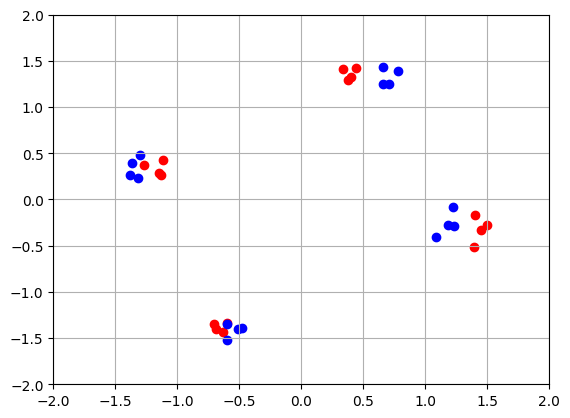

In [5]:
EbNo = 10 ** (7/10)
n,k = 2,2
model = Fig5(2**k,n,EbNo)
criterion = nn.CrossEntropyLoss().to(device) # Define my loss functino
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(100):
    print(epoch)
    cost = 0.0
    i = 0
    for (a, (x,y)) in enumerate(train_dataloader):
        i += 1
        x = x.to(device)
        y = y.to(device)
        #print(x.shape)
        output = model(x)
        loss1 = criterion(y[:,0:n],output[:,0:n])
        loss2 = criterion(y[:,n:(2*n)],output[:,n:(2*n)])
        with torch.no_grad():
            a = loss1 / (loss1+loss2)
        loss = a * loss1 + (1-a) * loss2

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost += loss
    #print(EbNo, cost/i)
with torch.no_grad():
    x,y = dataset[:]
    x = x.to(device)
    output = model(x).detach().numpy()
    y = y.numpy()
    u1_index = np.argmax(output[:,0:n],axis=1)
    u2_index = np.argmax(output[:,n:2*n],axis=1)
    print(output.shape)
    u1_true = np.argmax(y[:,0:n], axis=1)
    u2_true = np.argmax(y[:,n:2*n],axis=1)
    Ps1 = len(np.nonzero(u1_index - u1_true)[0])/u1_true.shape[0]
    Ps2 = len(np.nonzero(u2_index - u2_true)[0])/u2_true.shape[0]
    print(Ps1,Ps2)

A = np.zeros(((2**k)*(2**k),(2**k)*2))
for i in range(2**k):
    for j in range(2**k):
        A[((2**k)*i)+j,i] = 1
        A[(2**k)*i+j,2**k+j]=1
A = torch.tensor(A)
A = A.to(torch.float32)
coord = model.f(A).detach().numpy()

import matplotlib.pyplot as plt
print(coord.shape)
for dot in coord[:,0:n]:
    plt.scatter(dot[0],dot[1],color='r')
for dot in coord[:,n:2*n]:
    plt.scatter(dot[0],dot[1],color='b')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid(True)
plt.show()

In [54]:
model.f(A)

RuntimeError: ignored